In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from math import cos, sin, radians, sqrt
import random

In [2]:
def x_distance(angle):
    rad = radians(angle)
    g = 9.81 # m/s square
    vx0 = v0*cos(rad)

    # time of flight
    t = 2*v0*sin(rad)/g

    # H distance
    x = vx0*t
    max_dist = int(x)
    return max_dist

def y_distance(angle):
    rad = radians(angle)
    g = 9.81 # m/s square

    y = v0 * sin(rad)**2
    return int(y)

def time(angle):
    rad = radians(angle)
    g = 9.81 # m/s square
    t = 2*v0*sin(rad)/g
    return t

In [3]:
v0 = 30       # m/s
max_dist = x_distance(45)
human_dist = random.randint(int(max_dist*2/3), max_dist)

# print
print('Initial velocity: %d m/s' % v0)
print('Target distance: %d m' % human_dist)
print()
print('Time of flight: %2.2f s' % time(45))
print('Horizontal range: %d m' % x_distance(45))
print('Vertical range: %d m' % y_distance(45))
print('=========================')

Initial velocity: 30 m/s
Target distance: 60 m

Time of flight: 4.32 s
Horizontal range: 91 m
Vertical range: 14 m


/home/weiyee/anaconda3/envs/project/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


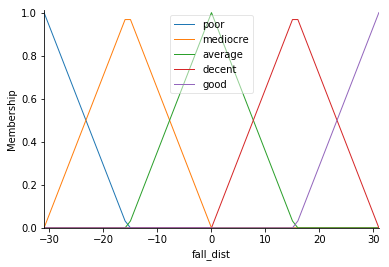

In [4]:
fall_range = max_dist - human_dist
fall_dist = ctrl.Antecedent(np.arange(-fall_range, fall_range+1, 1), 'fall_dist')

# Membership function
fall_dist.automf(5)
fall_dist.view()

In [5]:
fall_range = max_dist - human_dist
print(fall_range)
print(human_dist + fall_range)
print(human_dist - fall_range)

31
91
29


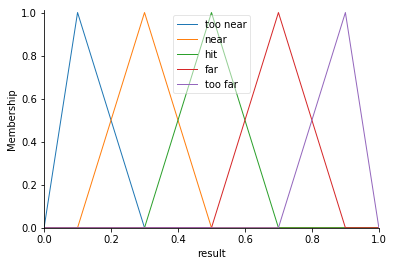

In [6]:
result = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'result')

# Very Small, Small, Medium, Big, Very Big
univ = result.universe
result['too near'] = fuzz.trimf(univ, [0, 0.1, 0.3])
result['near'] = fuzz.trimf(univ, [0.1, 0.3, 0.5])
result['hit'] = fuzz.trimf(univ, [0.3, 0.5, 0.7])
result['far'] = fuzz.trimf(univ, [0.5, 0.7, 0.9])
result['too far'] = fuzz.trimf(univ, [0.7, 0.9, 1])

result.view()

#### Fuzzy rules

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb4be525550>)

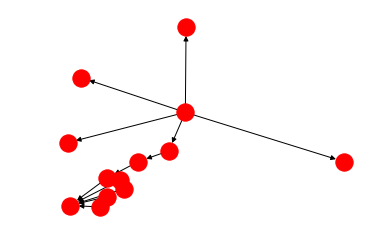

In [7]:
rule1 = ctrl.Rule(fall_dist['poor'], result['too near'])
rule2 = ctrl.Rule(fall_dist['mediocre'], result['near'])
rule3 = ctrl.Rule(fall_dist['average'], result['hit'])
rule4 = ctrl.Rule(fall_dist['decent'], result['far'])
rule5 = ctrl.Rule(fall_dist['good'], result['too far'])

rule1.view()

#### Control System Creation and Simulation

In [8]:
result_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
result_degree = ctrl.ControlSystemSimulation(result_ctrl)

In [9]:
def shoot(my_angle):
    print('Current angle: %d' % my_angle)
    my_shoot = x_distance(my_angle)
    result_degree.input['fall_dist'] = my_shoot - human_dist

    # Crunch the numbers
    result_degree.compute()
    end = result_degree.output['result']
    print(end)
#     result.view(sim=result_degree)
    
    if 0.4 <= end <= 0.6:
        print('Hit!')
        return True
    elif end > 0.6:
        print("Need to decrease angle." + '\n')
        return shoot(my_angle-1)
    else:
        print("Need to increase angle." + '\n')
        return shoot(my_angle-1)

In [10]:
shoot(45)

Current angle: 45
0.8666666666666666
Need to decrease angle.

Current angle: 44
0.8666666666666666
Need to decrease angle.

Current angle: 43
0.8666666666666666
Need to decrease angle.

Current angle: 42
0.8666666666666666
Need to decrease angle.

Current angle: 41
0.8440145176539959
Need to decrease angle.

Current angle: 40
0.8440145176539959
Need to decrease angle.

Current angle: 39
0.8261362886733953
Need to decrease angle.

Current angle: 38
0.8261362886733953
Need to decrease angle.

Current angle: 37
0.8114417126164281
Need to decrease angle.

Current angle: 36
0.7989261448940989
Need to decrease angle.

Current angle: 35
0.7879120428467146
Need to decrease angle.

Current angle: 34
0.7779124870703135
Need to decrease angle.

Current angle: 33
0.759827183339345
Need to decrease angle.

Current angle: 32
0.7523595608978287
Need to decrease angle.

Current angle: 31
0.7451582628176988
Need to decrease angle.

Current angle: 30
0.730667172675522
Need to decrease angle.

Current an

True

In [11]:
!jupyter nbconvert --to script shooting.ipynb

[NbConvertApp] Converting notebook shooting.ipynb to script
[NbConvertApp] Writing 3122 bytes to shooting.py
